In [51]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import textwrap

In [3]:
# URL of the quote API
url = 'https://api.quotable.io/random'

# function that pulls a random quote from the database
def get_quote():
  r = requests.get(url)
  quote = r.json()
  return (quote['content'])
  print(quote['content'])
  print('     -',quote['author'])


In [4]:
# list that contains all letters in alphabetic order
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
            't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
# function to turn a word into an RGB value
def word_to_colour(word):
    word = word.lower()
    letters = []
    alphabet_positions = []

    for i in word:
        if i.isalpha():  # check if the character is a letter so that punctuation will be ignored
            letters.append(i)

    letter_value = sum(ord(letter) for letter in letters)
    alphabet_positions = [alphabet.index(letter) + 1 for letter in letters]
    alphabet_word_value = sum(alphabet_positions)

    red = letter_value % 256
    green = alphabet_word_value % 256
    blue = alphabet_word_value // len(letters) * 10

    return red, green, blue

In [7]:
# function to determine the number of letters in a word
def count_letters(word):
  letter_number = 0
  for _ in word:
    letter_number += 1
  return letter_number

In [8]:
# function that uses the word_to_colour funtion on all the words in a text
def text_to_colours(text):
    word_list = text.split()
    red_values = []
    green_values = []
    blue_values = []

    for char in word_list:
      if char.isalpha: # check if the character is a letter so that punctuation will be ignored
        red, green, blue = word_to_colour(char)
        red_values.append(red)
        green_values.append(green)
        blue_values.append(blue)

    return red_values, green_values, blue_values

In [9]:
# function that uses the count_letters funtion on all the words in a text
def count_letters_in_text(text):
    word_number_list = []
    for word in text.split():
        letter_number = count_letters(word)
        word_number_list.append(letter_number)
    return word_number_list

In [78]:
# set a variable for the quote so that it can be used for image creation
text = get_quote()


# create lists for all RGB values created from the text and the number of letters in each word
red_values, green_values, blue_values = text_to_colours(text)
word_number_list = count_letters_in_text(text)

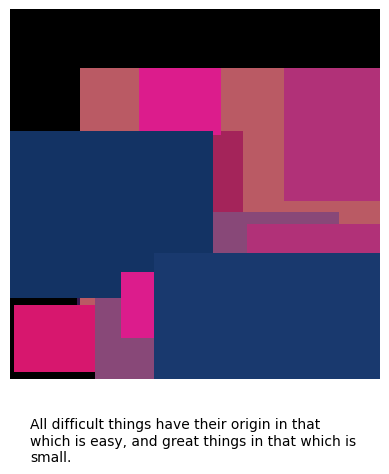

In [80]:
# Set the dimensions of the image
width, height = 100, 100

# Create a blank canvas (3 channels for RGB colors)
canvas = np.zeros((height, width, 3), dtype=np.uint8)
# set the number of iterations to the number of words in the quote
num_iterations = len(red_values)

# create a rectangle for each word, colour is dependent on RGB values and size on length of the word
for _ in range(num_iterations):
    x, y = np.random.randint(0, width), np.random.randint(0, height)
    r, g, b = red_values[_], green_values[_], blue_values[_]
    size = word_number_list[_]
    canvas[y - 2*size:y + 7*size, x - 6*size:x + 5*size] = [r, g, b]
    # Display the generative art image

# Create a figure and axes to place text below image
fig, ax = plt.subplots()

# Display image
ax.imshow(canvas)
ax.axis('off')  # Turn off axis ticks and labels

# position the text right below the
left_margin = 0.05
right_margin = 0.95
text_start_x = width * left_margin
text_end_x = width * right_margin

# wrap the text to a width that fits the image
wrapped_text = textwrap.fill(text, width=50)

# Add the text below the image
ax.text(text_start_x, height + 10, wrapped_text, verticalalignment='top', fontsize=10, color='black')
plt.imshow(canvas)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()
